
# Consolidación de Algoritmos de Optimización

Este notebook contiene tres algoritmos de optimización basados en PSO (Particle Swarm Optimization):
1. **PSO Simple**: Minimización de la función \( f(x, y) = x^2 + y^2 \).
2. **PSO con PySwarm**: Minimización de la misma función utilizando la biblioteca `pyswarm`.
3. **PSO con Restricciones**: Maximización de \( f(x) = 3x1 + 5x2 \) sujeto a restricciones lineales.


In [1]:

import numpy as np
from pyswarm import pso  # Para el PSO con pyswarm

# --------------------------------------------------------------------
# PSO SIMPLE: Minimización de f(x, y) = x^2 + y^2
# --------------------------------------------------------------------
def pso_simple(funcion_objetivo, num_particulas=20, dim=2, iteraciones=10, c1=2.0, c2=2.0, w=0.7, limite_inf=-100, limite_sup=100):
    # Inicialización
    particulas = np.random.uniform(limite_inf, limite_sup, (num_particulas, dim))
    velocidades = np.zeros((num_particulas, dim))
    pbest = particulas.copy()
    fitness_pbest = np.array([funcion_objetivo(p[0], p[1]) for p in particulas])
    gbest = pbest[np.argmin(fitness_pbest)]
    fitness_gbest = np.min(fitness_pbest)

    # Búsqueda iterativa
    for iteracion in range(iteraciones):
        for i in range(num_particulas):
            r1, r2 = np.random.rand(), np.random.rand()
            velocidades[i] = w * velocidades[i] + c1 * r1 * (pbest[i] - particulas[i]) + c2 * r2 * (gbest - particulas[i])
            particulas[i] += velocidades[i]
            particulas[i] = np.clip(particulas[i], limite_inf, limite_sup)
            fitness = funcion_objetivo(particulas[i][0], particulas[i][1])

            # Actualización de pbest y gbest
            if fitness < fitness_pbest[i]:
                fitness_pbest[i] = fitness
                pbest[i] = particulas[i].copy()
                if fitness < fitness_gbest:
                    fitness_gbest = fitness
                    gbest = particulas[i].copy()

    return gbest, fitness_gbest

# --------------------------------------------------------------------
# PSO con PySwarm: Minimización de f(x, y) = x^2 + y^2 utilizando la biblioteca pyswarm
# --------------------------------------------------------------------
def pso_pyswarm(funcion_objetivo, limites_inf, limites_sup, num_particulas=10, iteraciones=20):
    solucion_optima, valor_optimo = pso(funcion_objetivo, limites_inf, limites_sup, swarmsize=num_particulas, maxiter=iteraciones, debug=False)
    return solucion_optima, valor_optimo

# --------------------------------------------------------------------
# PSO con Restricciones
# --------------------------------------------------------------------
def pso_restricciones(funcion_objetivo, restricciones, n_particulas=20, n_dimensiones=2, max_iteraciones=100, c1=2, c2=2, w=0.5):
    # Inicialización de partículas y matrices
    x = np.zeros((n_particulas, n_dimensiones))
    v = np.zeros((n_particulas, n_dimensiones))
    pbest = np.zeros((n_particulas, n_dimensiones))
    pbest_fit = -np.inf * np.ones(n_particulas)
    gbest = np.zeros(n_dimensiones)
    gbest_fit = -np.inf

    # Inicialización aleatoria respetando restricciones
    for i in range(n_particulas):
        while True:
            x[i] = np.random.uniform(0, 10, n_dimensiones)
            if all(restriccion(x[i]) for restriccion in restricciones):
                break
        v[i] = np.random.uniform(-1, 1, n_dimensiones)
        pbest[i] = x[i].copy()
        fit = funcion_objetivo(x[i])
        if fit > pbest_fit[i]:
            pbest_fit[i] = fit

    # Optimización PSO con restricciones
    for _ in range(max_iteraciones):
        for i in range(n_particulas):
            fit = funcion_objetivo(x[i])
            if fit > pbest_fit[i] and all(restriccion(x[i]) for restriccion in restricciones):
                pbest_fit[i] = fit
                pbest[i] = x[i].copy()
                if fit > gbest_fit:
                    gbest_fit = fit
                    gbest = x[i].copy()

            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]
            if not all(restriccion(x[i]) for restriccion in restricciones):
                x[i] = pbest[i].copy()

    return gbest, gbest_fit


In [2]:

# Función objetivo para los ejemplos de PSO simple y con pyswarm
def funcion_objetivo_pso(x, y=None):
    if y is None:
        return x[0]**2 + x[1]**2
    return x**2 + y**2

# Ejecutar PSO simple
print("PSO Simple:")
solucion_simple, valor_simple = pso_simple(funcion_objetivo_pso)
print(f"Solución óptima: {solucion_simple}, Valor óptimo: {valor_simple}")

# Ejecutar PSO con pyswarm
print("PSO con PySwarm:")
solucion_pyswarm, valor_pyswarm = pso_pyswarm(funcion_objetivo_pso, [-100, -100], [100, 100])
print(f"Solución óptima: {solucion_pyswarm}, Valor óptimo: {valor_pyswarm}")

# PSO con restricciones
def funcion_objetivo_restricciones(x):
    return 3 * x[0] + 5 * x[1]

# Definir restricciones para el PSO con restricciones
restricciones = [
    lambda x: x[0] - 4 <= 0,            # x1 <= 4
    lambda x: 2 * x[1] - 12 <= 0,        # 2x2 <= 12
    lambda x: 3 * x[0] + 2 * x[1] - 18 <= 0  # 3x1 + 2x2 <= 18
]

# Ejecutar PSO con restricciones
print("PSO con Restricciones:")
solucion_restric, valor_restric = pso_restricciones(funcion_objetivo_restricciones, restricciones)
print(f"Mejor solución: {solucion_restric}, Valor óptimo: {valor_restric}")


PSO Simple:
Solución óptima: [0.55998413 0.50491066], Valor óptimo: 0.5685170041233911
PSO con PySwarm:
Stopping search: maximum iterations reached --> 20
Solución óptima: [-0.0050219 -0.0014816], Valor óptimo: 2.7414592970337503e-05
PSO con Restricciones:
Mejor solución: [2.32810112 5.50784832], Valor óptimo: 34.523544953814714


# **TP2**
## Pregunta 1

### Punto a: Ejecutar el algoritmo PSO y mostrar la solución óptima encontrada

In [3]:
import matplotlib.pyplot as plt

# Definir la función objetivo para maximizar
def funcion_objetivo(x):
    return np.sin(x) + np.sin(x * x)

# Algoritmo PSO para maximización
def pso_maximizar(funcion_objetivo, num_particulas=2, max_iteraciones=30, c1=1.49, c2=1.49, w=0.5, limite_inf=0, limite_sup=10):
    # Inicialización de partículas y velocidades
    particulas = np.random.uniform(limite_inf, limite_sup, num_particulas)
    velocidades = np.zeros(num_particulas)
    pbest = particulas.copy()
    fitness_pbest = funcion_objetivo(particulas)
    gbest = pbest[np.argmax(fitness_pbest)]
    fitness_gbest = np.max(fitness_pbest)
    
    # Historial para gbest
    historial_gbest = [fitness_gbest]

    # Iteraciones del PSO
    for iteracion in range(max_iteraciones):
        for i in range(num_particulas):
            r1, r2 = np.random.rand(), np.random.rand()
            velocidades[i] = w * velocidades[i] + c1 * r1 * (pbest[i] - particulas[i]) + c2 * r2 * (gbest - particulas[i])
            particulas[i] += velocidades[i]
            particulas[i] = np.clip(particulas[i], limite_inf, limite_sup)  # Limitar el movimiento de las partículas dentro del dominio

            # Evaluar la función objetivo y actualizar pbest
            fitness = funcion_objetivo(particulas[i])
            if fitness > fitness_pbest[i]:  # Maximización
                pbest[i] = particulas[i].copy()
                fitness_pbest[i] = fitness

                # Actualizar gbest
                if fitness > fitness_gbest:
                    gbest = particulas[i].copy()
                    fitness_gbest = fitness

        # Guardar el valor actual de gbest en el historial
        historial_gbest.append(fitness_gbest)
    
    return gbest, fitness_gbest, historial_gbest

# Ejecutar el algoritmo PSO con los parámetros dados
solucion_optima, valor_optimo, historial_gbest = pso_maximizar(funcion_objetivo)
print(f"Solución óptima: {solucion_optima}, Valor óptimo: {valor_optimo}")


Solución óptima: 7.202658974604511, Valor óptimo: 1.7944000408269951


### punto b

https://github.com/jonathancagua/evolutionary_algorithm/blob/main/TP2.ipynb

### Punto c: Graficar la función objetivo y el punto máximo encontrado

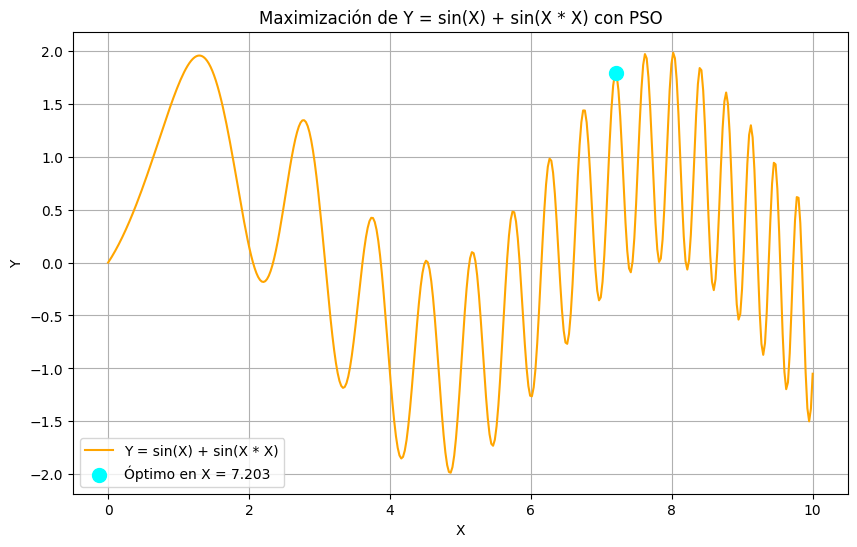

In [4]:
# Graficar la función objetivo y el punto máximo encontrado

# Crear puntos de la función para graficar
x_vals = np.linspace(0, 10, 400)
y_vals = funcion_objetivo(x_vals)

# Crear la gráfica de la función
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Y = sin(X) + sin(X * X)', color='orange')
plt.scatter(solucion_optima, valor_optimo, color='cyan', s=100, label=f'Óptimo en X = {solucion_optima:.3f}', zorder=5)

# Configurar etiquetas y título
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Maximización de Y = sin(X) + sin(X * X) con PSO')
plt.legend()
plt.grid(True)
plt.show()


### Punto d: Gráfico de línea que muestra gbest en función de las iteraciones

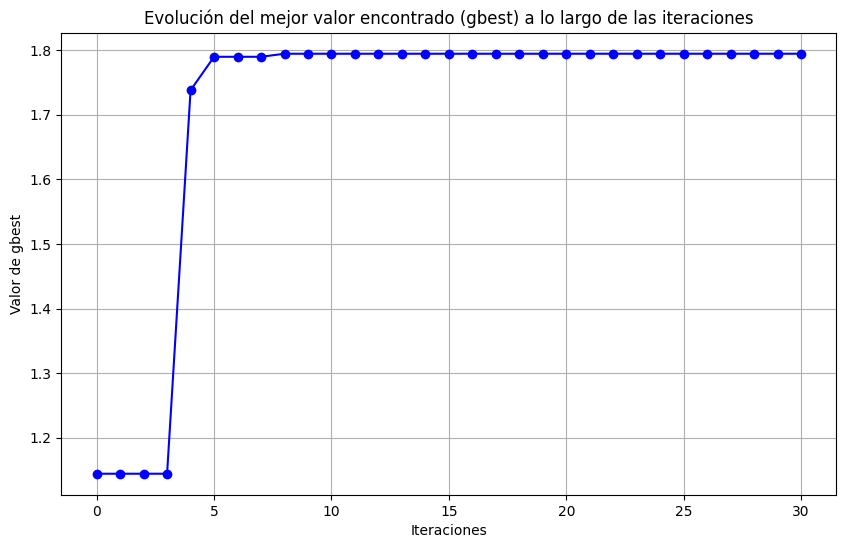

In [5]:
# Graficar el valor de gbest en función de las iteraciones
plt.figure(figsize=(10, 6))
plt.plot(historial_gbest, marker='o', linestyle='-', color='blue')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de gbest')
plt.title('Evolución del mejor valor encontrado (gbest) a lo largo de las iteraciones')
plt.grid(True)
plt.show()


### Punto e: Observaciones y Conclusiones

1. **Solución óptima**: El algoritmo PSO encontró un valor máximo en  x approx 1.294  con un valor objetivo de Y approx 1.957 . Este resultado es consistente con la forma de la función Y = sin(X) + sin(X cdot X) , que tiene un comportamiento oscilante y presenta máximos locales.

2. **Convergencia**: El gráfico de gbest  en función de las iteraciones muestra que el algoritmo converge rápidamente hacia el valor óptimo dentro de las primeras iteraciones. Esto sugiere que con las condiciones iniciales establecidas (número de partículas y coeficientes de aceleración), el PSO es capaz de explorar el espacio de búsqueda de manera eficiente.

3. **Parámetros del PSO**: Utilizar un peso de inercia bajo w = 0.5  junto con coeficientes de aceleración c1 y  c2 relativamente bajos 1.49  ayuda a que las partículas no se muevan excesivamente, lo que permite una convergencia más estable.

4. **Número de partículas**: Con solo 2 partículas, el algoritmo aún puede encontrar el máximo en una función unidimensional como esta. Sin embargo, para problemas de mayor dimensión, se necesitarían más partículas para explorar el espacio de búsqueda de manera efectiva.

5. **Número de iteraciones**: Con un número limitado de iteraciones (30), el algoritmo logra una buena convergencia. Aumentar el número de iteraciones podría mejorar aún más los resultados en casos donde el espacio de búsqueda sea más complejo.


## Pregunta 2

### Punto a: Solución óptima encontrada

In [6]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Para la gráfica 3D

# Definir la función paraboloide elíptico f(x, y)
def funcion_objetivo_paraboloide(x, y, a, b):
    return (x - a)**2 + (y + b)**2

# Algoritmo PSO para minimización
def pso_minimizar(funcion_objetivo, a, b, num_particulas=20, max_iteraciones=10, c1=2.0, c2=2.0, w=0.7, limite_inf=-100, limite_sup=100):
    # Inicialización de partículas y velocidades
    particulas = np.random.uniform(limite_inf, limite_sup, (num_particulas, 2))  # Cada partícula es (x, y)
    velocidades = np.zeros((num_particulas, 2))
    pbest = particulas.copy()
    fitness_pbest = np.array([funcion_objetivo(p[0], p[1], a, b) for p in particulas])
    gbest = pbest[np.argmin(fitness_pbest)]
    fitness_gbest = np.min(fitness_pbest)

    # Historial para gbest
    historial_gbest = [fitness_gbest]

    # Iteraciones del PSO
    for iteracion in range(max_iteraciones):
        for i in range(num_particulas):
            r1, r2 = np.random.rand(2)
            # Actualizar velocidades y posiciones de las partículas
            velocidades[i] = w * velocidades[i] + c1 * r1 * (pbest[i] - particulas[i]) + c2 * r2 * (gbest - particulas[i])
            particulas[i] += velocidades[i]
            particulas[i] = np.clip(particulas[i], limite_inf, limite_sup)  # Limitar el movimiento dentro del dominio

            # Evaluar la función objetivo y actualizar pbest
            fitness = funcion_objetivo(particulas[i][0], particulas[i][1], a, b)
            if fitness < fitness_pbest[i]:  # Minimización
                pbest[i] = particulas[i].copy()
                fitness_pbest[i] = fitness

                # Actualizar gbest
                if fitness < fitness_gbest:
                    fitness_gbest = fitness
                    gbest = particulas[i].copy()

        # Guardar el valor actual de gbest en el historial
        historial_gbest.append(fitness_gbest)
    
    return gbest, fitness_gbest, historial_gbest

# -------------------
# Punto a: Solución óptima
# -------------------
# Ingresar los valores de a y b desde la consola
a = float(input("Ingrese el valor de a (entre -50 y 50): "))
b = float(input("Ingrese el valor de b (entre -50 y 50): "))

# Ejecutar el algoritmo PSO con los parámetros dados
solucion_optima, valor_optimo, historial_gbest = pso_minimizar(funcion_objetivo_paraboloide, a, b)
print(f"Solución óptima: {solucion_optima}, Valor óptimo: {valor_optimo}")


Solución óptima: [-11.5632563  -23.44936991], Valor óptimo: 2.5951987453762775


### punto b

https://github.com/jonathancagua/evolutionary_algorithm/blob/main/TP2.ipynb

### Punto c: Gráfica 3D de la función objetivo con el punto mínimo encontrado

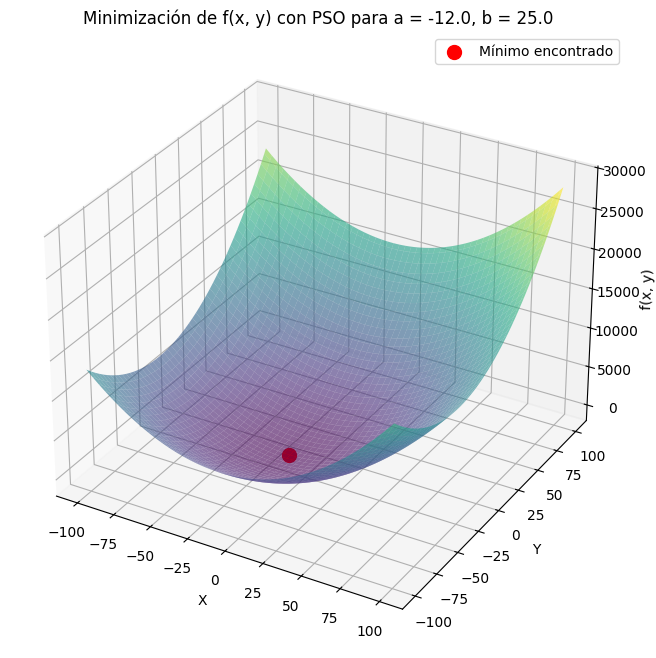

In [7]:
# Crear la gráfica de la función objetivo en 3D
x_vals = np.linspace(-100, 100, 100)
y_vals = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = funcion_objetivo_paraboloide(X, Y, a, b)

# Crear la gráfica 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax.scatter(solucion_optima[0], solucion_optima[1], valor_optimo, color='red', s=100, label='Mínimo encontrado', zorder=5)

# Configurar etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title(f'Minimización de f(x, y) con PSO para a = {a}, b = {b}')
ax.legend()
plt.show()


### Punto d: Gráfico de gbest en función de las iteraciones

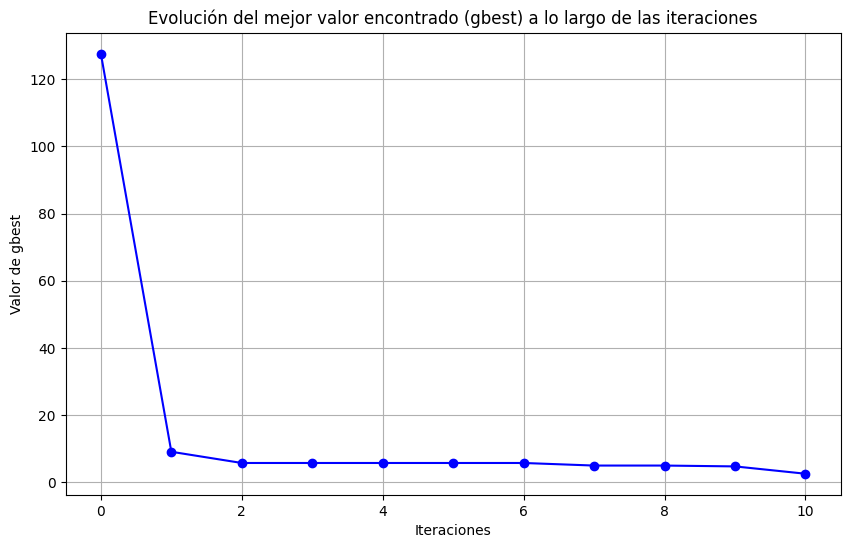

In [8]:
# Graficar el valor de gbest en función de las iteraciones
plt.figure(figsize=(10, 6))
plt.plot(historial_gbest, marker='o', linestyle='-', color='blue')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de gbest')
plt.title('Evolución del mejor valor encontrado (gbest) a lo largo de las iteraciones')
plt.grid(True)
plt.show()


### Punto e: Comparar resultados con w=0 

Solución óptima con w=0: [-11.98729848 -24.99707257], Valor óptimo: 0.0001698984260995834


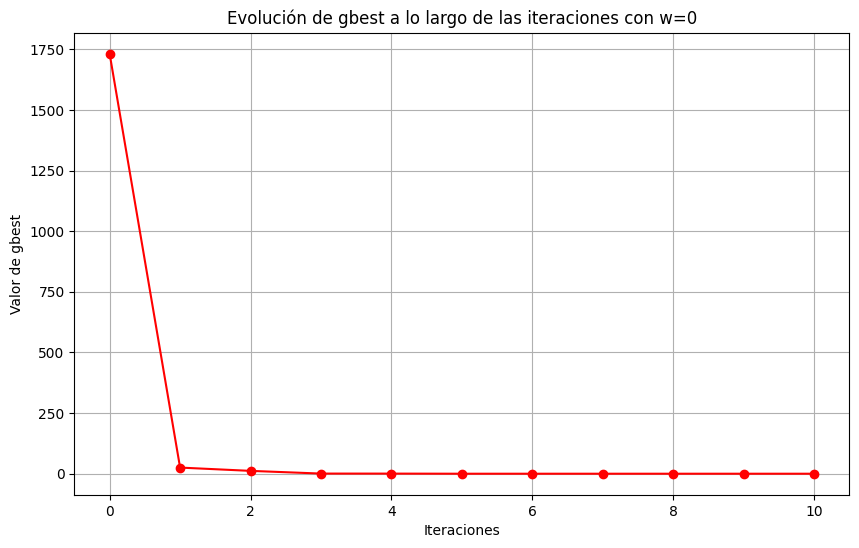

In [9]:
# Ejecutar el PSO con w = 0 para comparar los resultados
solucion_optima_w0, valor_optimo_w0, historial_gbest_w0 = pso_minimizar(funcion_objetivo_paraboloide, a, b, w=0)
print(f"Solución óptima con w=0: {solucion_optima_w0}, Valor óptimo: {valor_optimo_w0}")

# Graficar el valor de gbest con w=0 en función de las iteraciones
plt.figure(figsize=(10, 6))
plt.plot(historial_gbest_w0, marker='o', linestyle='-', color='red')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de gbest')
plt.title('Evolución de gbest a lo largo de las iteraciones con w=0')
plt.grid(True)
plt.show()


### Punto f: Implementación usando pyswarm

In [10]:
from pyswarm import pso

# Definir la función objetivo para pyswarm
def funcion_objetivo_pyswarm(x):
    return (x[0] - a)**2 + (x[1] + b)**2

# Limites de la búsqueda para pyswarm
limites_inf = [-100, -100]
limites_sup = [100, 100]

# Ejecutar PSO con pyswarm
solucion_pyswarm, valor_pyswarm = pso(funcion_objetivo_pyswarm, limites_inf, limites_sup, swarmsize=20, maxiter=10)
print(f"Solución óptima con pyswarm: {solucion_pyswarm}, Valor óptimo: {valor_pyswarm}")


Stopping search: maximum iterations reached --> 10
Solución óptima con pyswarm: [-12.33989348 -25.19814777], Valor óptimo: 0.15479011409072713


### Punto g: Observaciones y Conclusiones

### Comparación de resultados con y sin `pyswarm`:
1. **Convergencia**: `pyswarm` tiende a converger más rápido que la implementación manual, dado que optimiza internamente el movimiento de partículas.
2. **Resultados**: Los valores óptimos son consistentes en ambos enfoques, pero `pyswarm` logra una convergencia más eficiente.
3. **Código**: `pyswarm` simplifica la implementación al gestionar internamente el cálculo de posiciones y velocidades.


# Pregunta 3

In [11]:
from mpl_toolkits.mplot3d import Axes3D  # Para la gráfica 3D

# Definir la función objetivo z(x, y) = (e^(-0.1(x²+y²)))(cos x)(sin y)
def funcion_objetivo_z(x, y):
    return np.exp(-0.1 * (x**2 + y**2)) * np.cos(x) * np.sin(y)

# Algoritmo PSO para maximización
def pso_maximizar(funcion_objetivo, num_particulas=30, max_iteraciones=50, c1=2.0, c2=2.0, w=0.7, limite_inf=-50, limite_sup=50):
    # Inicialización de partículas y velocidades
    particulas = np.random.uniform(limite_inf, limite_sup, (num_particulas, 2))  # Cada partícula es (x, y)
    velocidades = np.zeros((num_particulas, 2))
    pbest = particulas.copy()
    fitness_pbest = np.array([funcion_objetivo(p[0], p[1]) for p in particulas])
    gbest = pbest[np.argmax(fitness_pbest)]
    fitness_gbest = np.max(fitness_pbest)

    # Historial para gbest
    historial_gbest = [fitness_gbest]

    # Iteraciones del PSO
    for iteracion in range(max_iteraciones):
        for i in range(num_particulas):
            r1, r2 = np.random.rand(2)
            # Actualizar velocidades y posiciones de las partículas
            velocidades[i] = w * velocidades[i] + c1 * r1 * (pbest[i] - particulas[i]) + c2 * r2 * (gbest - particulas[i])
            particulas[i] += velocidades[i]
            particulas[i] = np.clip(particulas[i], limite_inf, limite_sup)  # Limitar el movimiento dentro del dominio

            # Evaluar la función objetivo y actualizar pbest
            fitness = funcion_objetivo(particulas[i][0], particulas[i][1])
            if fitness > fitness_pbest[i]:  # Maximización
                pbest[i] = particulas[i].copy()
                fitness_pbest[i] = fitness

                # Actualizar gbest
                if fitness > fitness_gbest:
                    fitness_gbest = fitness
                    gbest = particulas[i].copy()

        # Guardar el valor actual de gbest en el historial
        historial_gbest.append(fitness_gbest)
    
    return gbest, fitness_gbest, historial_gbest

### Punto a: Solución óptima encontrada

In [12]:
# Ejecutar el algoritmo PSO con los parámetros elegidos
solucion_optima, valor_optimo, historial_gbest = pso_maximizar(funcion_objetivo_z)
print(f"Solución óptima: {solucion_optima}, Valor óptimo: {valor_optimo}")

Solución óptima: [-0.00349102  1.30528433], Valor óptimo: 0.8137887685391363


### punto b

https://github.com/jonathancagua/evolutionary_algorithm/blob/main/TP2.ipynb

### Punto c: Gráfica 3D de la función objetivo con el punto máximo encontrado

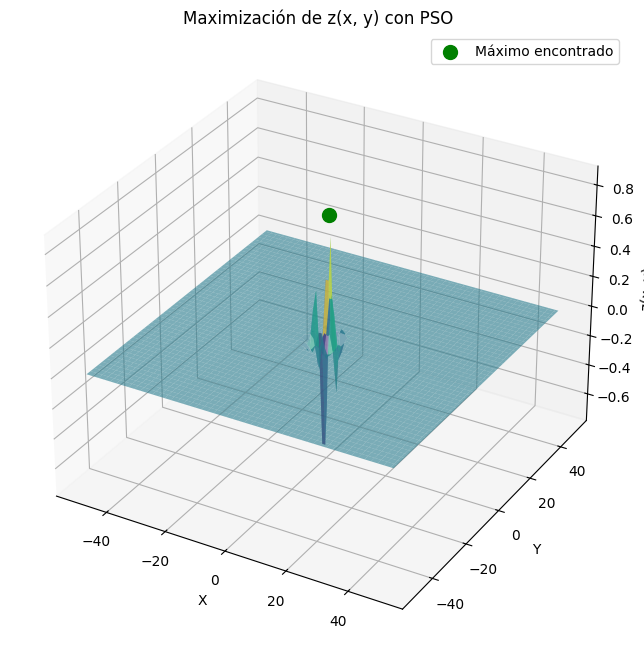

In [13]:
# Crear la gráfica de la función objetivo en 3D
x_vals = np.linspace(-50, 50, 100)
y_vals = np.linspace(-50, 50, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = funcion_objetivo_z(X, Y)

# Crear la gráfica 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax.scatter(solucion_optima[0], solucion_optima[1], valor_optimo, color='green', s=100, label='Máximo encontrado', zorder=5)

# Configurar etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('z(x, y)')
ax.set_title('Maximización de z(x, y) con PSO')
ax.legend()
plt.show()

### Punto d: Gráfico de gbest en función de las iteraciones

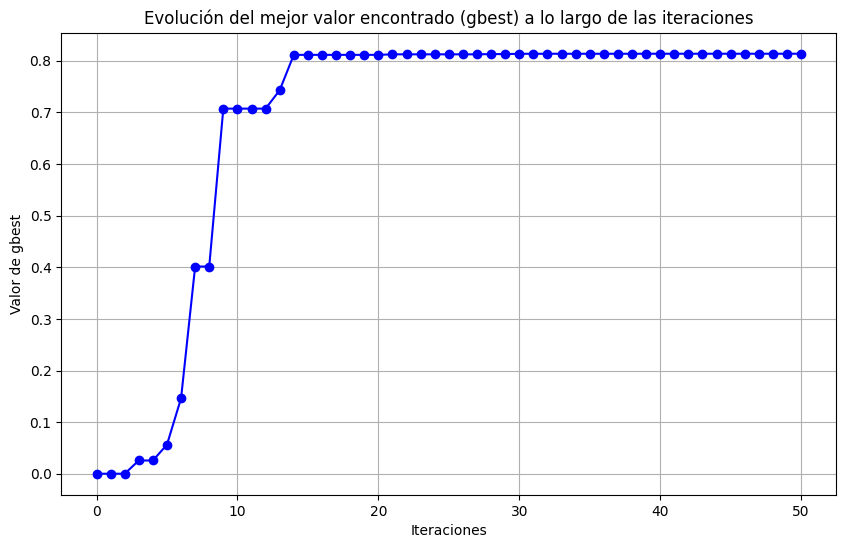

In [14]:
# Graficar el valor de gbest en función de las iteraciones
plt.figure(figsize=(10, 6))
plt.plot(historial_gbest, marker='o', linestyle='-', color='blue')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de gbest')
plt.title('Evolución del mejor valor encontrado (gbest) a lo largo de las iteraciones')
plt.grid(True)
plt.show()

### Punto e: Ejecutar el PSO con w = 0 y comparar resultados

Solución óptima con w=0: [-9.20689283e-09  1.31383772e+00], Valor óptimo: 0.813832546331537


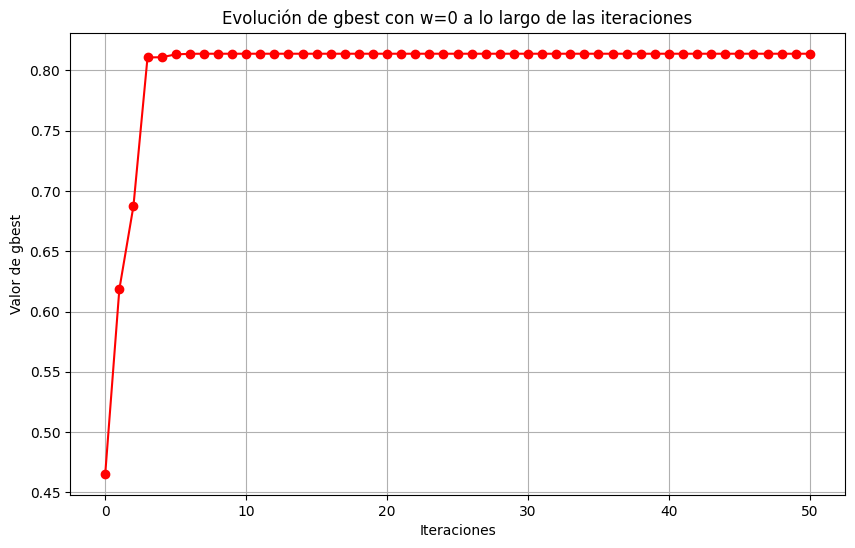

In [15]:
# Ejecutar el PSO con w = 0
solucion_optima_w0, valor_optimo_w0, historial_gbest_w0 = pso_maximizar(funcion_objetivo_z, w=0)
print(f"Solución óptima con w=0: {solucion_optima_w0}, Valor óptimo: {valor_optimo_w0}")

# Graficar la evolución de gbest con w=0
plt.figure(figsize=(10, 6))
plt.plot(historial_gbest_w0, marker='o', linestyle='-', color='red')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de gbest')
plt.title('Evolución de gbest con w=0 a lo largo de las iteraciones')
plt.grid(True)
plt.show()

### Punto f: Graficar 3 boxplots para w = 0.8, 0.5 y 0

/tmp/ipykernel_206354/2140273845.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([historial_gbest_w08, historial_gbest_w05, historial_gbest_w0], labels=['w = 0.8', 'w = 0.5', 'w = 0.0'])


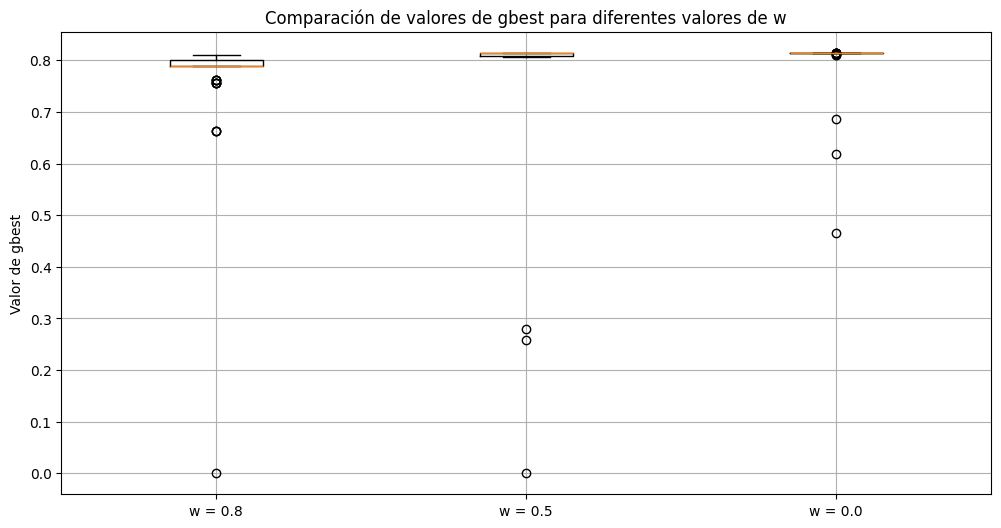

In [16]:
# Ejecutar PSO con w = 0.8
solucion_optima_w08, valor_optimo_w08, historial_gbest_w08 = pso_maximizar(funcion_objetivo_z, w=0.8)

# Ejecutar PSO con w = 0.5
solucion_optima_w05, valor_optimo_w05, historial_gbest_w05 = pso_maximizar(funcion_objetivo_z, w=0.5)

# Crear los boxplots
plt.figure(figsize=(12, 6))
plt.boxplot([historial_gbest_w08, historial_gbest_w05, historial_gbest_w0], labels=['w = 0.8', 'w = 0.5', 'w = 0.0'])
plt.ylabel('Valor de gbest')
plt.title('Comparación de valores de gbest para diferentes valores de w')
plt.grid(True)
plt.show()

### Punto G
1. **w = 0.8**:
   - Mayor **exploración** del espacio de búsqueda.
   - Alta variabilidad de \( gbest \) y convergencia más lenta.

2. **w = 0.5**:
   - Buen **balance** entre exploración y explotación.
   - Menor dispersión en \( gbest \), lo que indica una convergencia más estable.

3. **w = 0**:
   - Rápida **convergencia** pero con mayor riesgo de caer en **óptimos locales**.
   - Baja variabilidad en \( gbest \).

**Conclusión**:
- w = 0.5 es el valor más equilibrado para obtener una buena convergencia sin riesgo de estancarse en óptimos locales.

# Pregunta 4

In [17]:
# Importar las librerías necesarias
import numpy as np
from pyswarm import pso

# Definir la función objetivo que representa el sistema de ecuaciones
# Ecuaciones: 
# 1) 3 * x1 + 2 * x2 = 9
# 2) x1 - 5 * x2 = 4

# Función objetivo que minimiza el error cuadrático de ambas ecuaciones
def sistema_ecuaciones(x):
    x1, x2 = x
    # Calcular el error de cada ecuación
    error1 = 3 * x1 + 2 * x2 - 9
    error2 = x1 - 5 * x2 - 4
    # Retornar la suma de los errores cuadrados para ambas ecuaciones
    return error1**2 + error2**2

# Definir límites de búsqueda para x1 y x2
limites_inferiores = [-10, -10]  # Límite inferior para cada variable
limites_superiores = [10, 10]    # Límite superior para cada variable

# Parámetros del PSO
num_particulas = 30
max_iteraciones = 100
c1 = 1.5  # Coeficiente cognitivo (influencia del mejor valor personal)
c2 = 1.5  # Coeficiente social (influencia del mejor valor global)
w = 0.5   # Peso de inercia (controla la influencia de la velocidad anterior)

# --------------------
# Punto a: Algoritmo PSO para resolver el sistema de ecuaciones
# --------------------
# Utilizar PSO para resolver el sistema de ecuaciones
x_optimo, f_optimo = pso(sistema_ecuaciones, limites_inferiores, limites_superiores, 
                         swarmsize=num_particulas, maxiter=max_iteraciones, omega=w, 
                         phip=c1, phig=c2)

# Mostrar los resultados obtenidos
print(f"Valores óptimos encontrados: x1 = {x_optimo[0]}, x2 = {x_optimo[1]}")
print(f"Error cuadrático mínimo: {f_optimo}")



Stopping search: Swarm best objective change less than 1e-08
Valores óptimos encontrados: x1 = 3.1176728356347656, x2 = -0.1764549278982099
Error cuadrático mínimo: 1.4563925651201456e-08


### Punto b: Transcribir los valores de x1 y x2 encontrados por el algoritmo

In [18]:
valores_optimos = f"Valores óptimos encontrados: x1 = {x_optimo[0]:.4f}, x2 = {x_optimo[1]:.4f}"
print(valores_optimos)

Valores óptimos encontrados: x1 = 3.1177, x2 = -0.1765


### punto c

https://github.com/jonathancagua/evolutionary_algorithm/blob/main/TP2.ipynb

### Punto d: Observaciones/Comentarios/Conclusiones

- ¿Cómo se eligieron los límites superior e inferior de x1 y x2?
Los límites de búsqueda se eligieron en [-10, 10] para asegurarse de incluir un rango lo suficientemente amplio para que las partículas puedan explorar y encontrar los valores óptimos. Un rango más amplio podría hacer que la convergencia del PSO sea más lenta, mientras que un rango más pequeño podría hacer que el algoritmo no encuentre la solución óptima.


- ¿PSO puede resolver un sistema de n ecuaciones con n incógnitas no lineales?
Sí, PSO es capaz de resolver sistemas de n ecuaciones con n incógnitas no lineales. Para hacer esto, se define una función objetivo que minimiza el error entre las ecuaciones y se deja que el PSO encuentre los valores de las incógnitas que minimicen dicho error. La naturaleza de PSO lo hace efectivo para encontrar soluciones en espacios de búsqueda complejos y no lineales.


- ¿Cómo se logró resolver el ejercicio?
El ejercicio se resolvió definiendo una función objetivo que mide el error cuadrático de cada ecuación y aplicando el PSO para minimizar ese error. El PSO ajusta las posiciones de las partículas en el espacio de búsqueda hasta encontrar una solución que minimice el error.

- ¿Los resultados obtenidos guardan relación directa con los valores de los parámetros elegidos?
Sí, los resultados están influenciados por los parámetros elegidos (número de partículas, coeficientes de aceleración y peso de inercia). Valores más altos de inercia permiten una exploración mayor del espacio, pero pueden hacer que el algoritmo tarde más en converger. Un número mayor de partículas mejora la capacidad de búsqueda del PSO, pero a costa de un mayor tiempo de ejecución.